<a href="https://colab.research.google.com/github/nanochiplab/Makine_Ogrenmesi/blob/main/Vize_%C3%96devi_Makine_%C3%96%C4%9Frenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
# Ortalamaları hesapla
ortalama_area = round(df['Area'].mean())
ortalama_perimeter = round(df['Perimeter'].mean(), 3)

In [ ]:
#%5 ve %35 MISSİNG VALUE İLE DOLDURMA
for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

df.loc[df.sample(frac=0.35).index, 'ConvexArea'] = np.nan

df.to_excel("Dry_Bean_Missing.xlsx", index=False)
#df.to_csv("Dry_Bean_Missing_Example.csv", index=False)

In [ ]:
df=pd.read_excel('Dry_Bean_Missing.xlsx')
#df.pd.read_csv("Dry_Bean_Missing_Example.csv", index=False)
df.isnull().sum()

,0
Area,681
Perimeter,681
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,4764
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
# NaN değerlerini ortalama ile doldur
df['Area'] = df['Area'].fillna(ortalama_area)
df['Perimeter'] = df['Perimeter'].fillna(ortalama_perimeter)

df.to_excel("Dry_Bean_Missing2.xlsx", index=False)

In [ ]:
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,4764
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
# %35'lik nan içeren ConvexArea satırlarını silme
df = df.dropna(subset=['ConvexArea'])
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
df.to_excel("Dry_Bean_Missing3.xlsx", index=False)

In [ ]:
from scipy import stats

In [ ]:
def aykiri_degerleri_bul_zscore(df, sutunlar, esik=3):
    aykiri_indeksler = []
    for sutun in sutunlar:
        zscores = np.abs(stats.zscore(df[sutun]))
        sutun_aykiri_indeksler = df[zscores > esik].index
        aykiri_indeksler.extend(sutun_aykiri_indeksler)

    aykiri_indeksler = list(set(aykiri_indeksler))
    return aykiri_indeksler

In [ ]:
sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist()
print(sayisal_sutunlar)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8847 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFactor1     8847 non-null   float64
 13  ShapeFactor2     8847 non-null   float64
 14  ShapeFactor3     8847 non-null   float64
 15  ShapeFactor4     8847 non-null   float64
 16  Class            8847 non-null   object 
dtypes: float64(16), ob

In [ ]:
aykiri_indeksler = aykiri_degerleri_bul_zscore(df, sayisal_sutunlar)

In [ ]:
df.loc[aykiri_indeksler]  # Aykırı değerleri içeren satırları görüntüle
df = df.drop(aykiri_indeksler)  # Aykırı değerleri içeren satırları sil

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8120 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8120 non-null   float64
 1   Perimeter        8120 non-null   float64
 2   MajorAxisLength  8120 non-null   float64
 3   MinorAxisLength  8120 non-null   float64
 4   AspectRation     8120 non-null   float64
 5   Eccentricity     8120 non-null   float64
 6   ConvexArea       8120 non-null   float64
 7   EquivDiameter    8120 non-null   float64
 8   Extent           8120 non-null   float64
 9   Solidity         8120 non-null   float64
 10  roundness        8120 non-null   float64
 11  Compactness      8120 non-null   float64
 12  ShapeFactor1     8120 non-null   float64
 13  ShapeFactor2     8120 non-null   float64
 14  ShapeFactor3     8120 non-null   float64
 15  ShapeFactor4     8120 non-null   float64
 16  Class            8120 non-null   object 
dtypes: float64(16), ob

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sayısal sütunları seçin
sayisal_sutunlar = df.select_dtypes(include=np.number).drop(columns=['class'], errors='ignore').columns.tolist()

# StandardScaler nesnesi oluşturun
scaler = StandardScaler()

# Verileri ölçeklendirin
olcekli_veri = scaler.fit_transform(df[sayisal_sutunlar])

# Ölçeklendirilmiş verileri görüntüleyin
print(df.head())

      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395.0    610.291       208.178117       173.888747      1.197191   
2  29380.0    624.110       212.826130       175.931143      1.209713   
5  30279.0    634.927       212.560556       181.510182      1.171067   
6  30477.0    670.033       211.050155       184.039050      1.146768   
7  30519.0    629.727       212.996755       182.737204      1.165591   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
5      0.520401     30600.0     196.347702  0.775688  0.989510   0.943852   
6      0.489478     30970.0     196.988633  0.762402  0.984081   0.853080   
7      0.513760     30847.0     197.124320  0.770682  0.989367   0.967109   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturduk
etiketle = LabelEncoder()

# Sınıf etiketlerini içeren sütunu seçin (örneğin, 'class' sütunu)
sinif_etiketi_sutunu = 'Class'

# Sınıf etiketlerini numerik hale getirin
df[sinif_etiketi_sutunu] = etiketle.fit_transform(df[sinif_etiketi_sutunu])
df.to_excel("Dry_Bean_Missing4.xlsx", index=False)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA nesnesi oluşturun
pca = PCA()

# Ölçeklendirilmiş verilere PCA uygulayın
principal_components = pca.fit_transform(olcekli_veri)

# Açıklanan varyans oranlarını alın
# Açıklanan varyans oranlarını görüntüleyin
print(pca.explained_variance_ratio_)
explained_variance_ratios = pca.explained_variance_ratio_

[6.02056035e-01 2.26214934e-01 6.68051428e-02 5.39368701e-02
 3.04214278e-02 7.71124132e-03 4.61713993e-03 3.23314382e-03
 3.05317417e-03 1.47821230e-03 4.16621607e-04 4.02136138e-05
 1.07888101e-05 4.87207022e-06 1.26157233e-07 5.62224567e-08]


In [ ]:
# Açıklanan varyans oranlarının ortalamasını hesaplayın
ortalama_varyans = np.mean(explained_variance_ratios)

# Ortalamadan büyük olan varyans oranlarının indekslerini bulun
bileşen_sayisi = np.where(explained_variance_ratios > ortalama_varyans)[0].shape[0]

# PCA nesnesini belirlenen bileşen sayısı ile yeniden oluşturun
X_pca = PCA(n_components=bileşen_sayisi)
principal_components = X_pca.fit_transform(olcekli_veri)

# Açıklanan varyans oranlarını görüntüleyin
print(X_pca.explained_variance_ratio_)

# Açıklanan varyans oranlarının kümülatif toplamını görüntüleyin
print(np.cumsum(X_pca.explained_variance_ratio_))

[0.60205604 0.22621493 0.06680514]
[0.60205604 0.82827097 0.89507611]


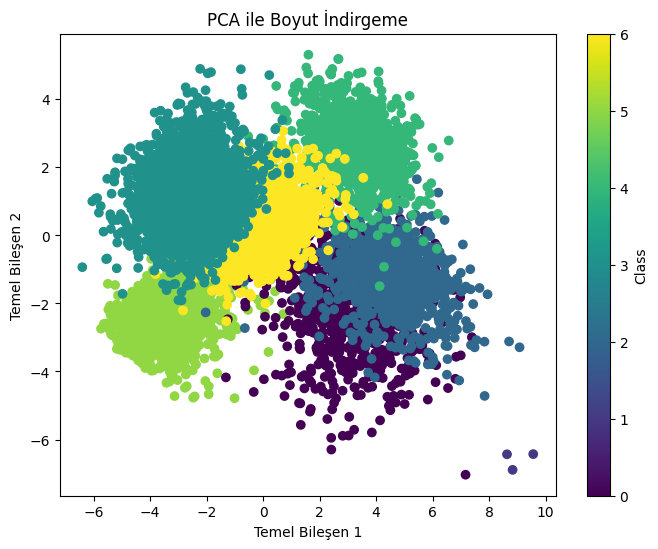

In [ ]:
# İlk iki temel bileşeni alın
PC1 = principal_components[:, 0]
PC2 = principal_components[:, 1]

# Sınıf etiketlerini alın
sinif_etiketleri = df['Class']

# Grafik oluşturun
plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, c=sinif_etiketleri, cmap='viridis')
plt.xlabel('Temel Bileşen 1')
plt.ylabel('Temel Bileşen 2')
plt.title('PCA ile Boyut İndirgeme')
plt.colorbar(label='Class')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA nesnesi oluşturun ve bileşen sayısını 3 olarak belirleyin
X_lda = LDA(n_components=3)

# Ölçeklendirilmiş verilere ve sınıf etiketlerine LDA uygulayın
lda_components = X_lda.fit_transform(olcekli_veri, df['Class'])

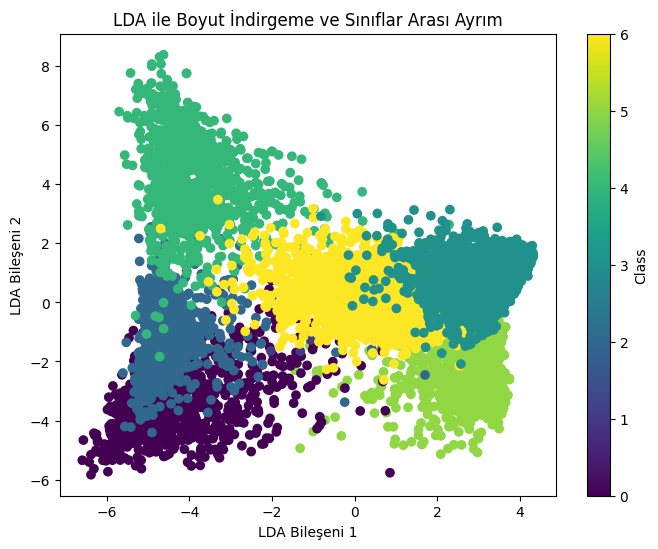

In [ ]:
# İlk iki LDA bileşenini alın
LDA1 = lda_components[:, 0]
LDA2 = lda_components[:, 1]

# Sınıf etiketlerini alın
sinif_etiketleri = df['Class']

# Grafik oluşturun
plt.figure(figsize=(8, 6))
plt.scatter(LDA1, LDA2, c=sinif_etiketleri, cmap='viridis')
plt.xlabel('LDA Bileşeni 1')
plt.ylabel('LDA Bileşeni 2')
plt.title('LDA ile Boyut İndirgeme ve Sınıflar Arası Ayrım')
plt.colorbar(label='Class')
plt.show()

In [ ]:
# ... (LDA kodunuz) ...

# LDA1 bileşenini görüntüleyin
print(X_lda.scalings_[:, 0])  # Öznitelik ağırlıkları
#print(lda_components[:, 0])  # Bileşen değerleri

# Pandas DataFrame'ine dönüştürün ve görüntüleyin
#lda_df = pd.DataFrame(lda_components, columns=['LDA1', 'LDA2', 'LDA3'])
#print(lda_df['LDA1'])

[-2.69466446e-02  6.45129798e-02  6.38056421e+01  2.01817842e+01
 -2.28578181e+00 -7.09457410e+00  2.23957414e+01 -1.08139163e+02
 -7.17412535e-02  3.40471089e-01  4.59066301e-01  6.47057086e+01
 -1.71266640e+00 -1.87087214e+01 -4.91429396e+01  7.44075903e-01]


In [49]:
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Sınıflandırıcıları bir listede toplayın
classifiers = [
    #LogisticRegression(random_state=12),
    LogisticRegression(random_state=42, max_iter=1000),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
]
#Kodu dikkatli kullanın
#Adım 2: Veri temsillerini hazırlayın:

# 1. Ham veri
X_raw = df.drop('Class', axis=1)
y = df['Class']

# Veri temsillerini bir sözlükte toplayın
data_representations = {
    'Ham Veri': X_raw,
    'PCA Dönüştürülmüş Veri': X_pca,
    'LDA Dönüştürülmüş Veri': X_lda
}

In [ ]:
!pip install xgboost
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier  # OneVsRestClassifier eklendi
import matplotlib.pyplot as plt

# ... (Veri yükleme, ön işleme ve model tanımları için mevcut kodunuz) ...

cv = KFold(n_splits=5, shuffle=True, random_state=42)  # CV nesnesi

results = []
best_models = {}  # Her veri temsili için en iyi modelleri saklayın

for data_name, X in data_representations.items():
    for classifier in classifiers:
        # Modelin adını alın
        model_name = type(classifier).__name__

        # Metrikleri depolamak için listeler
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Veri temsiline göre bölme için doğru verileri kullanın
        if data_name == 'PCA Dönüştürülmüş Veri':
            data_to_split = principal_components  # PCA için principal_components kullanın
        elif data_name == 'LDA Dönüştürülmüş Veri':
            data_to_split = lda_components  # LDA için lda_components kullanın
        else:
            data_to_split = X  # Diğer temsiller için orijinal verileri kullanın

        for train_index, test_index in cv.split(data_to_split):
            # .iloc kullanarak satırları seçin
            # Veri temsili PCA veya LDA ise, dönüştürülmüş verileri doğrudan kullanın
            if data_name == 'PCA Dönüştürülmüş Veri':
                X_train, X_test = principal_components[train_index], principal_components[test_index]
            elif data_name == 'LDA Dönüştürülmüş Veri':
                X_train, X_test = lda_components[train_index], lda_components[test_index]
            else:
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)

            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
            recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


        # Ortalama ve standart sapmayı hesaplayın
        results.append([data_name, model_name,
                        np.mean(accuracy_scores), np.std(accuracy_scores),
                        np.mean(precision_scores), np.std(precision_scores),
                        np.mean(recall_scores), np.std(recall_scores),
                        np.mean(f1_scores), np.std(f1_scores)])

        # Ortalama doğruluğa göre en iyi modeli saklayın
        avg_accuracy = np.mean(accuracy_scores)
        if data_name not in best_models or avg_accuracy > best_models[data_name][1]:
            best_models[data_name] = (classifier, avg_accuracy)

# Sonuçları DataFrame'e dönüştürün ve görüntüleyin
results_df = pd.DataFrame(results, columns=['Veri Temsili', 'Model',
                                           'Ortalama Accuracy', 'Standart Sapma Accuracy',
                                           'Ortalama Precision', 'Standart Sapma Precision',
                                           'Ortalama Recall', 'Standart Sapma Recall',
                                           'Ortalama F1-score', 'Standart Sapma F1-score'])
print(results_df)

# En iyi modeller için ROC Eğrileri ve ROC-AUC Skorları
for data_name, (best_model, _) in best_models.items():
    X = data_representations[data_name]

    # PCA veya LDA ise dönüştürülmüş verileri kullanın
    if data_name == 'PCA Dönüştürülmüş Veri':
        X = principal_components  # X_pca'yı principal_components olarak değiştirdik
    elif data_name == 'LDA Dönüştürülmüş Veri':
        X = lda_components  # lda_components'ı X_lda olarak değiştirdik

    # Modelin predict_proba özelliği olup olmadığını kontrol edin
    if hasattr(best_model, 'predict_proba'):
        y_score = best_model.fit(X, y).predict_proba(X)  # Olasılık tahminleri
    else:
        # Yoksa, bu model için ROC eğrisi hesaplamasını atlayın
        # SVC için decision_function kullanarak olasılık benzeri skorlar elde edin
        y_score = best_model.fit(X, y).decision_function(X)

    # Çıktıyı ikili hale getirin
    y_bin = label_binarize(y, classes=np.unique(y))
    n_classes = y_bin.shape[1]

    # Her sınıf için ROC eğrisini ve ROC alanını hesaplayın
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Her sınıf için ROC eğrilerini çizin
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (alan = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Yanlış Pozitif Oranı')
    plt.ylabel('Doğru Pozitif Oranı')
    plt.title(f'{data_name} için ROC Eğrisi ({type(best_model).__name__})')
    plt.legend(loc="lower right")
    plt.show()

    # ROC-AUC skorlarını yazdırın
    print(f"{data_name} için ROC-AUC Skorları ({type(best_model).__name__}):")
    for i in range(n_classes):
        print(f"Sınıf {i}: {roc_auc[i]:.2f}")

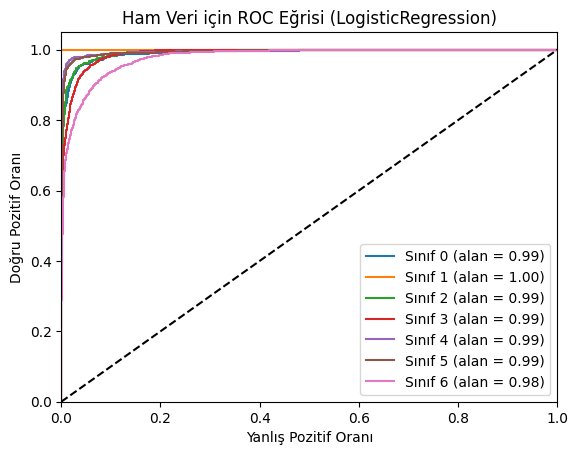

Ham Veri için ROC-AUC Skorları (LogisticRegression):
Sınıf 0: 0.99
Sınıf 1: 1.00
Sınıf 2: 0.99
Sınıf 3: 0.99
Sınıf 4: 0.99
Sınıf 5: 0.99
Sınıf 6: 0.98


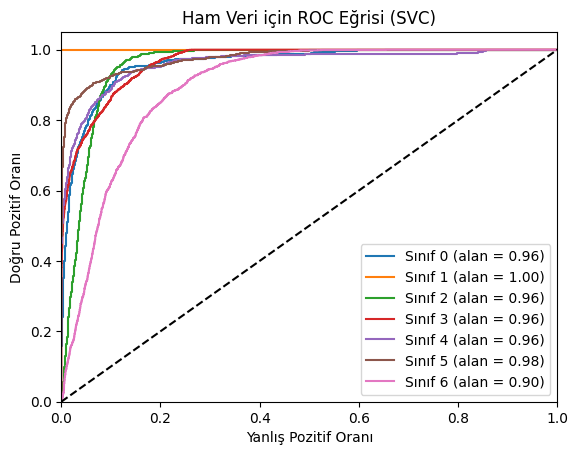

Ham Veri için ROC-AUC Skorları (SVC):
Sınıf 0: 0.96
Sınıf 1: 1.00
Sınıf 2: 0.96
Sınıf 3: 0.96
Sınıf 4: 0.96
Sınıf 5: 0.98
Sınıf 6: 0.90


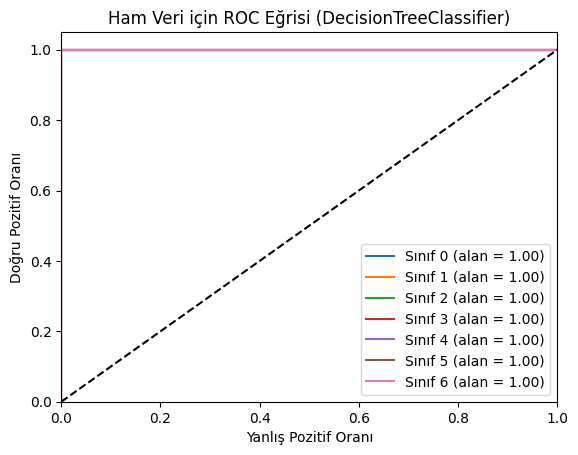

Ham Veri için ROC-AUC Skorları (DecisionTreeClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


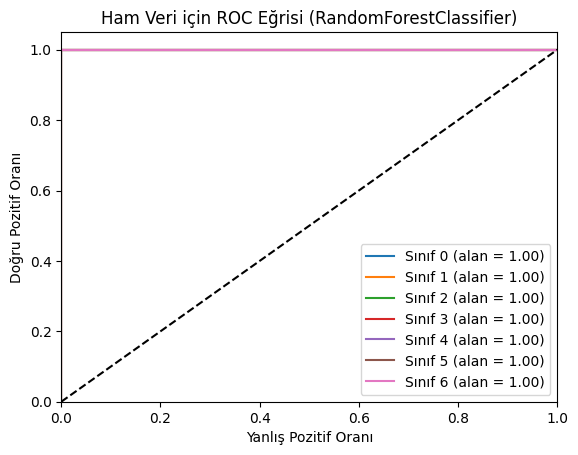

Ham Veri için ROC-AUC Skorları (RandomForestClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


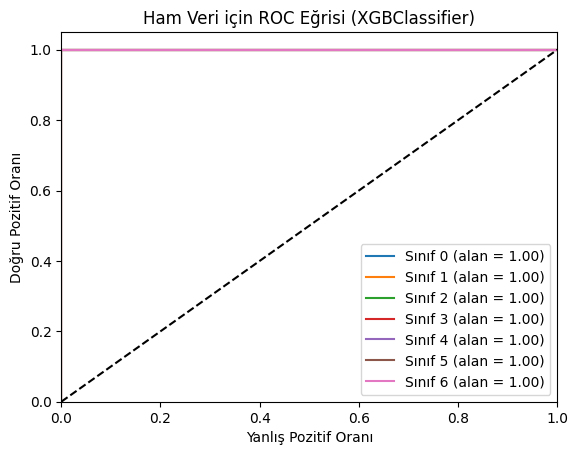

Ham Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


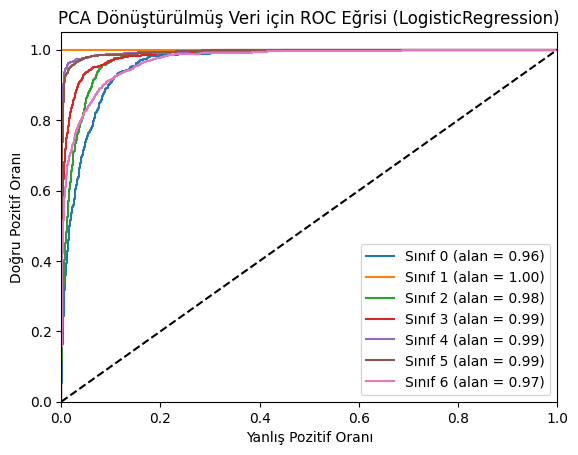

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (LogisticRegression):
Sınıf 0: 0.96
Sınıf 1: 1.00
Sınıf 2: 0.98
Sınıf 3: 0.99
Sınıf 4: 0.99
Sınıf 5: 0.99
Sınıf 6: 0.97


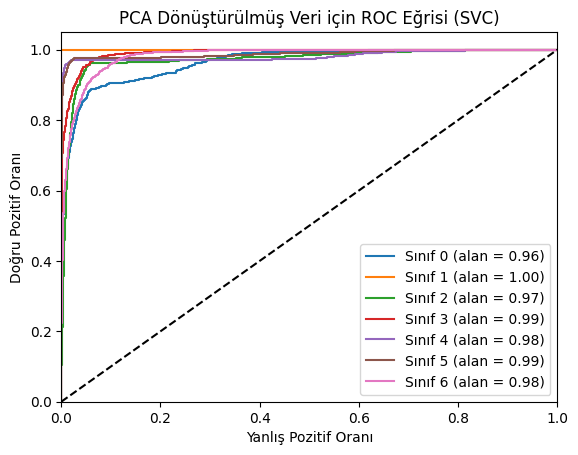

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (SVC):
Sınıf 0: 0.96
Sınıf 1: 1.00
Sınıf 2: 0.97
Sınıf 3: 0.99
Sınıf 4: 0.98
Sınıf 5: 0.99
Sınıf 6: 0.98


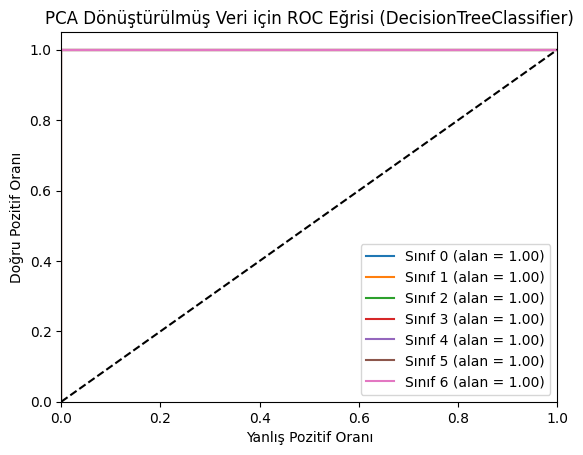

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (DecisionTreeClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


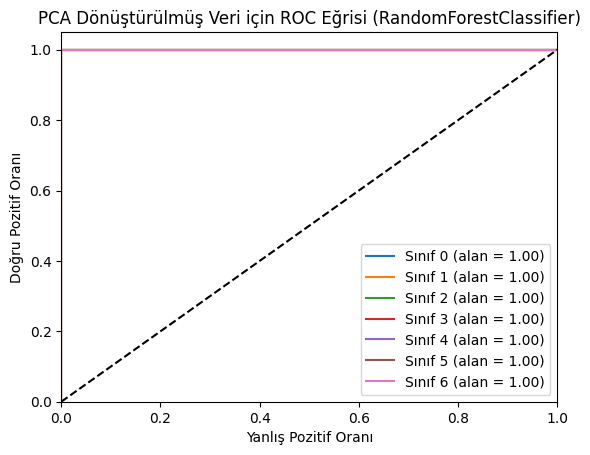

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (RandomForestClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


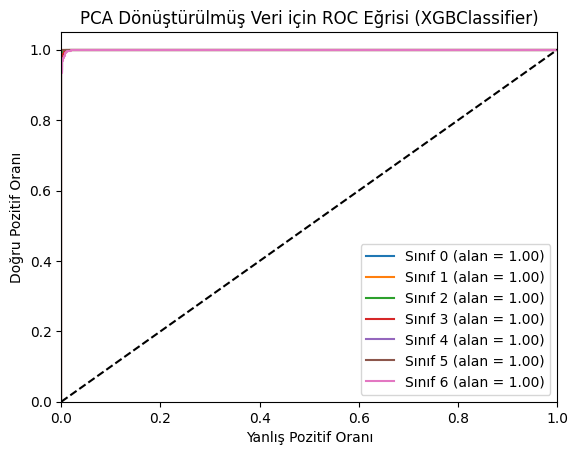

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


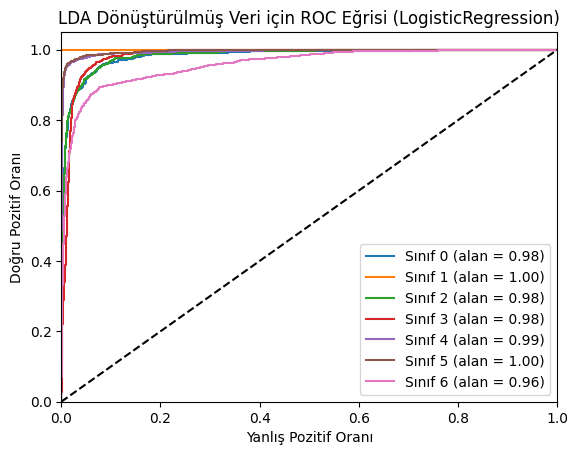

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (LogisticRegression):
Sınıf 0: 0.98
Sınıf 1: 1.00
Sınıf 2: 0.98
Sınıf 3: 0.98
Sınıf 4: 0.99
Sınıf 5: 1.00
Sınıf 6: 0.96


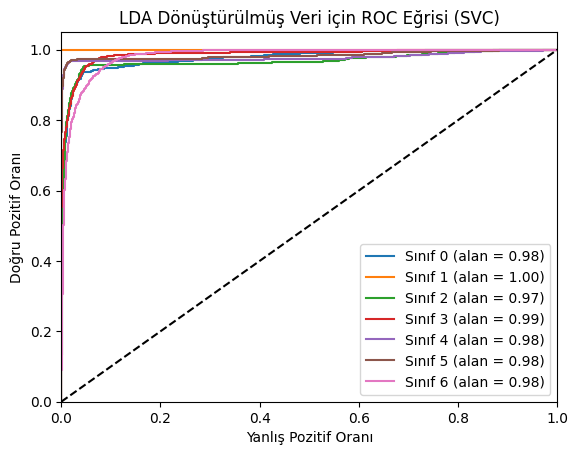

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (SVC):
Sınıf 0: 0.98
Sınıf 1: 1.00
Sınıf 2: 0.97
Sınıf 3: 0.99
Sınıf 4: 0.98
Sınıf 5: 0.98
Sınıf 6: 0.98


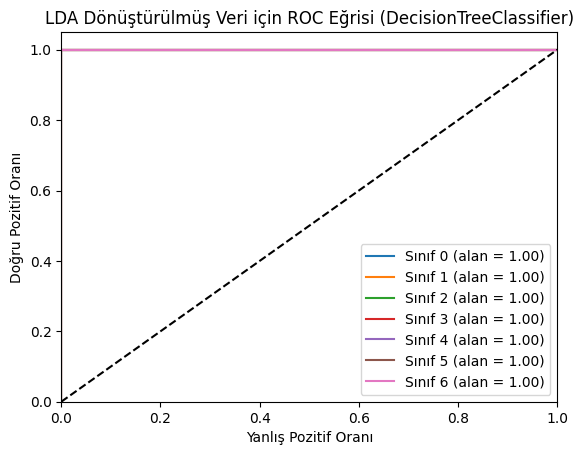

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (DecisionTreeClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


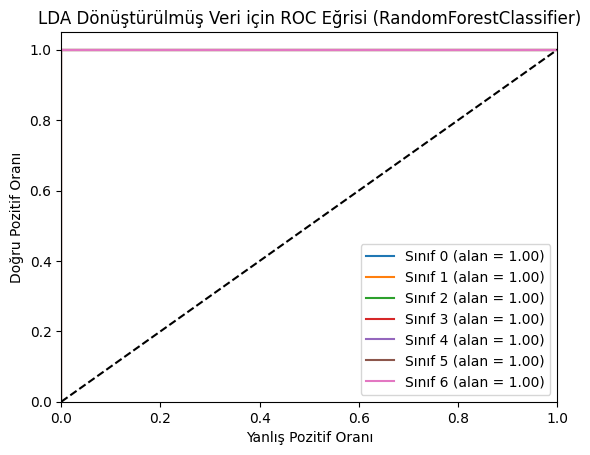

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (RandomForestClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


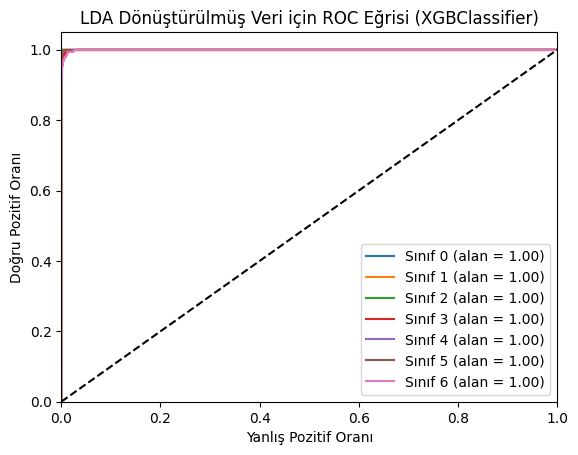

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


In [57]:
!pip install xgboost
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier  # OneVsRestClassifier eklendi
import matplotlib.pyplot as plt

# ... (Veri yükleme, ön işleme ve model tanımları için mevcut kodunuz) ...

cv = KFold(n_splits=5, shuffle=True, random_state=42)  # CV nesnesi

results = []
best_models = {}  # Her veri temsili için en iyi modelleri saklayın


# Tüm sınıflandırıcılar ve veri temsilleri için ROC Eğrileri ve ROC-AUC Skorları
for data_name, X in data_representations.items():
    for classifier in classifiers:
        model_name = type(classifier).__name__

        # PCA veya LDA ise dönüştürülmüş verileri kullanın
        if data_name == 'PCA Dönüştürülmüş Veri':
            X = principal_components
        elif data_name == 'LDA Dönüştürülmüş Veri':
            X = lda_components

        # OneVsRestClassifier ile sarın
        if model_name == 'XGBClassifier':  # XGBoost için num_class parametresini ayarlayın
            ovr_classifier = OneVsRestClassifier(classifier.set_params(num_class=len(np.unique(y))))
        else:
            ovr_classifier = OneVsRestClassifier(classifier)

        ovr_classifier.fit(X, y)

        # Tahmin skorlarını alın
        if hasattr(classifier, 'predict_proba'):
            y_score = ovr_classifier.predict_proba(X)
        else:
            y_score = ovr_classifier.decision_function(X)  # SVC gibi modeller için decision_function kullanın

        # Çıktıyı ikili hale getirin
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # Her sınıf için ROC eğrisini ve ROC alanını hesaplayın
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Her sınıf için ROC eğrilerini çizin
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (alan = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Yanlış Pozitif Oranı')
        plt.ylabel('Doğru Pozitif Oranı')
        plt.title(f'{data_name} için ROC Eğrisi ({model_name})')  # Başlığı model adıyla güncelleyin
        plt.legend(loc="lower right")
        plt.show()

        # ROC-AUC skorlarını yazdırın
        print(f"{data_name} için ROC-AUC Skorları ({model_name}):")  # Çıktıyı model adıyla güncelleyin
        for i in range(n_classes):
            print(f"Sınıf {i}: {roc_auc[i]:.2f}")